In [1]:
import sys
sys.path.append('../..')

In [2]:
import matplotlib.pyplot as plt
import numpy as np

from qubap.qiskit.jorge.MPS import Ansatz, VQE_pretrained
from qubap.qiskit.luciano.costfunc_barren_plateaus import test_hamiltonian, test_hamiltonian_2
from qubap.qiskit.luciano.variational_algorithms import VQE, energy_evaluation
from qubap.qiskit.jorge.tools import ladder_hamiltonian

from qiskit_aer import AerSimulator

In [3]:
# Control parameters
num_qubits = 10

num_iters = 200
num_iters_training = 200

num_shots = 2**6

In [4]:
# H  = test_hamiltonian_2(num_qubits)
H = ladder_hamiltonian(num_qubits)
H

PauliSumOp(SparsePauliOp(['ZZIIIIIIII', 'ZIZIIIIIII', 'IZIZIIIIII', 'IIZZIIIIII', 'IIZIZIIIII', 'IIIZIZIIII', 'IIIIZZIIII', 'IIIIZIZIII', 'IIIIIZIZII', 'IIIIIIZZII', 'IIIIIIZIZI', 'IIIIIIIZIZ', 'IIIIIIIIZZ'],
              coeffs=[1.+0.j, 1.+0.j, 1.+0.j, 1.+0.j, 1.+0.j, 1.+0.j, 1.+0.j, 1.+0.j, 1.+0.j,
 1.+0.j, 1.+0.j, 1.+0.j, 1.+0.j]), coeff=1.0)

In [5]:
backend_default = AerSimulator(shots=num_shots)

In [6]:
qc_mps  = Ansatz(num_qubits, diagonal=True)
qc_full = Ansatz(num_qubits, diagonal=False)

In [7]:
guess_naive = np.random.rand(qc_full.num_parameters) * np.pi
results_naive = VQE(H, qc_full, guess_naive, num_iters, backend_default, returns=['x', 'fx'])

In [8]:
results_trained = VQE_pretrained(H, backend_default, iters_vqe=num_iters, iters_train=num_iters_training, returns=['x', 'fx'])

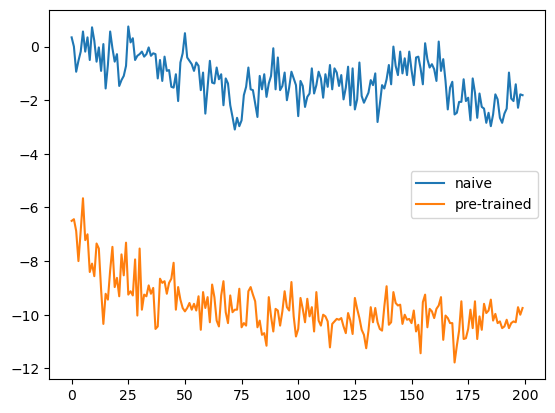

In [9]:
plt.plot(results_naive['fx'], label='naive')
plt.plot(results_trained[0]['fx'], label='pre-trained')
plt.legend(loc='best')

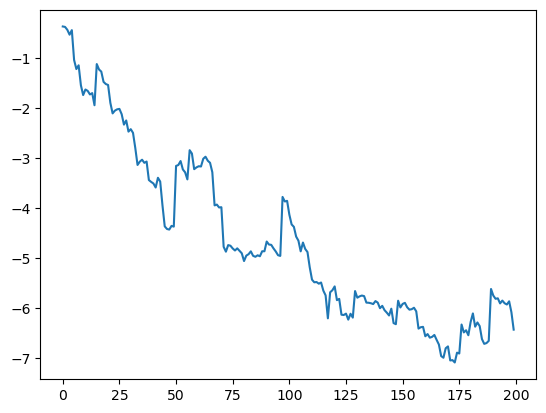

In [10]:
plt.plot(results_trained[1]['fx'])


In [11]:
import time
def measure_time(f, *args, **kwargs):
    '''
    Measure time in seconds.
    Returns time elapsed and the function result.
    '''
    start_time = time.time()
    result = f(*args, **kwargs)
    elapsed = time.time() - start_time
    return elapsed, result

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from qiskit_aer import AerSimulator

from qubap.qiskit.luciano.variational_algorithms import energy_evaluation
from qubap.qiskit.jorge.tools import ladder_hamiltonian
from qubap.qiskit.jorge.MPS import Ansatz


max_qubits = 50
max_qubits_default = 28 # Requires ~16Gb RAM
backend_mps     = AerSimulator(method='matrix_product_state',
                               matrix_product_state_max_bond_dimension=2)
backend_default = AerSimulator()

qubits_default, times_default = [], []
qubits_mps,     times_mps     = [], []
for num_qubits in range(2, max_qubits+1):
    H  = ladder_hamiltonian(num_qubits)
    qc = Ansatz(num_qubits, diagonal=True)

    params = np.random.rand(qc.num_parameters)

    secs_mps, _ = measure_time(energy_evaluation, H, qc, params, backend_mps)
    qubits_mps.append(num_qubits)
    times_mps.append(secs_mps)

    if num_qubits < max_qubits_default: # More kills my laptop
        secs_def, _ = measure_time(energy_evaluation, H, qc, params, backend_default)
        qubits_default.append(num_qubits)
        times_default.append(secs_def)


Text(0.5, 1.0, 'Time for a single Energy evaluation')

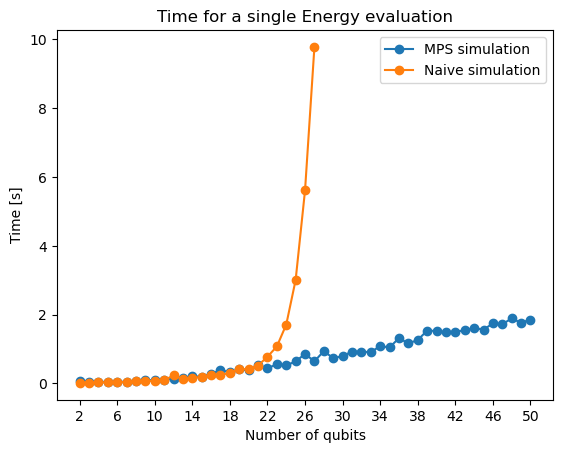

In [13]:
plt.plot(qubits_mps, times_mps, '-o', label='MPS simulation')
plt.plot(qubits_default, times_default, '-o', label='Naive simulation')
plt.xticks(qubits_mps[::4])
plt.legend()
plt.xlabel('Number of qubits')
plt.ylabel('Time [s]')
plt.title('Time for a single Energy evaluation')